In [73]:
#import packages
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA

In [74]:
#import data file & preview data 
df = pd.read_csv('/Users/Amanda.Hartzler/Desktop/Data_Analytics_Masters/D212/churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [75]:
#Select continuous variables and standardize dataset (Middleton, 2022)
PCA_df = df[['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]
PCA_df_normalized = (PCA_df - PCA_df.mean()) / PCA_df.std()
pca = PCA(n_components = PCA_df.shape[1])
pca.fit(PCA_df_normalized)

PCA(n_components=21)

In [76]:
#Copy of cleaned dataset 
PCA_df_normalized.to_csv('/Users/Amanda.Hartzler/Desktop/D212_PA_Task2.csv')

In [77]:
#Create dataframe to explain features of the dataset (Middleton, 2022)
test_pca = pd.DataFrame(pca.transform(PCA_df_normalized), 
                        columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21'])
print(test_pca)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     1.915916 -1.441235  1.743258 -3.295337  0.687004  2.972896 -0.094471   
1    -0.204644 -1.640289  0.531698 -0.658930 -0.244584 -0.563127 -0.881304   
2    -0.689598 -0.947397  0.164421 -1.687138  1.531576  1.134500 -0.641810   
3     0.008918 -0.737257  2.161356  0.863327 -0.205635  1.409441 -1.924710   
4     1.348566 -1.807565  0.722508  1.619847 -0.944568  1.107856  1.118346   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -2.107491  1.845945  0.205406 -0.890097  0.017334 -1.368244 -0.161938   
9996  1.924970  1.567665  0.743823  3.574298  0.442009  0.864741 -1.078661   
9997  1.443648  0.620295  0.006542 -0.236749  0.762950  0.490757  0.405764   
9998  1.990076  2.098788 -0.024340  1.979065 -0.932129 -0.121408 -1.748552   
9999 -2.272508  1.476573 -0.788662  0.895162 -0.724457 -0.922204 -1.892713   

           PC8       PC9      PC10  ...      PC12      PC13    

In [78]:
#PCA Loadings (Middleton, 2022)
loadings = pd.DataFrame(pca.components_.T, 
                        columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21'],
                        index = PCA_df_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
Lat,-0.001112,-0.023121,-0.007380,-0.713407,-0.025042,0.112069,-0.098595,-0.028808,-0.010332,-0.022292,...,-0.010790,0.057719,0.095224,0.660205,0.087845,-0.044067,-0.005204,0.015805,-0.011682,0.001011
Lng,0.008058,0.009447,0.022445,0.177972,-0.338392,-0.710967,0.354154,-0.092208,-0.064324,-0.066207,...,-0.094972,-0.158149,0.071398,0.360598,0.059220,-0.038542,0.017837,0.000416,-0.025267,0.000711
Population,-0.002181,-0.000771,0.015616,0.652679,0.173323,0.307612,-0.122630,0.097508,0.054599,0.067829,...,0.027218,0.108331,0.167885,0.606033,0.090310,-0.012212,0.000593,0.001053,-0.007964,-0.000064
Children,0.004128,0.015957,0.028784,-0.016885,0.413388,-0.493891,-0.097139,0.136314,0.066512,-0.076010,...,0.176812,0.690935,-0.019480,-0.004987,-0.013577,0.015098,0.013894,0.020949,-0.000465,-0.021623
Age,0.006509,0.000521,-0.028836,0.055294,-0.426834,0.263319,0.423545,-0.075478,-0.178439,0.096758,...,-0.323264,0.538841,0.035972,-0.043814,-0.002093,0.004171,-0.009878,0.005712,0.014211,0.022412
Income,0.001022,0.005808,0.025622,-0.055938,0.186964,-0.035440,0.324461,0.092339,0.779760,0.332631,...,-0.238138,-0.146506,0.024111,0.018182,-0.077328,0.007595,-0.002393,0.005199,0.013404,-0.000913
Outage_sec_perweek,-0.017494,0.003909,-0.014166,0.013937,-0.259856,-0.115988,-0.457488,0.584093,0.090340,-0.210243,...,-0.551538,-0.004926,0.081577,-0.049628,0.012222,0.010283,0.013432,0.017977,0.013847,0.000350
Email,0.008792,-0.019741,-0.002773,0.149799,-0.088409,-0.146479,-0.345697,-0.426345,0.036436,-0.135628,...,0.005453,-0.236985,-0.057343,0.041014,-0.012751,0.014797,0.005772,-0.016556,0.000869,0.000247
Contacts,-0.008725,0.003459,-0.011524,0.029306,-0.438742,0.141564,0.020315,0.020926,0.515860,-0.525189,...,0.454008,0.160663,-0.045656,0.000769,-0.035995,0.004012,-0.026819,0.020297,-0.000501,-0.000953
Yearly_equip_failure,-0.007705,0.017671,0.008043,-0.007244,0.150265,0.052174,0.415508,0.581382,-0.254131,-0.248981,...,0.266144,-0.294977,-0.013081,0.039989,0.010939,0.014188,-0.001251,0.007763,-0.021791,-0.000131


In [79]:
#Find the Eigenvalues of each PC (Kamara, 2022)
eg = pca.explained_variance_
eg_df = pd.DataFrame(eg.round(4), columns = ['Eigenvalues Per PC'], index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21'])
eg_df

,Eigenvalues Per PC
PC1,2.9487
PC2,1.9975
PC3,1.6369
PC4,1.2354
PC5,1.0532
PC6,1.0446
PC7,1.0233
PC8,1.0119
PC9,1.0015
PC10,0.9928


In [80]:
#Use Kaiser Rule to create scree plot/elbow charts of eigenvalues to determine which PCs should be kept (>1) (Middleton, 2022)
cov_matrix = np.dot(PCA_df_normalized.T, PCA_df_normalized) / PCA_df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

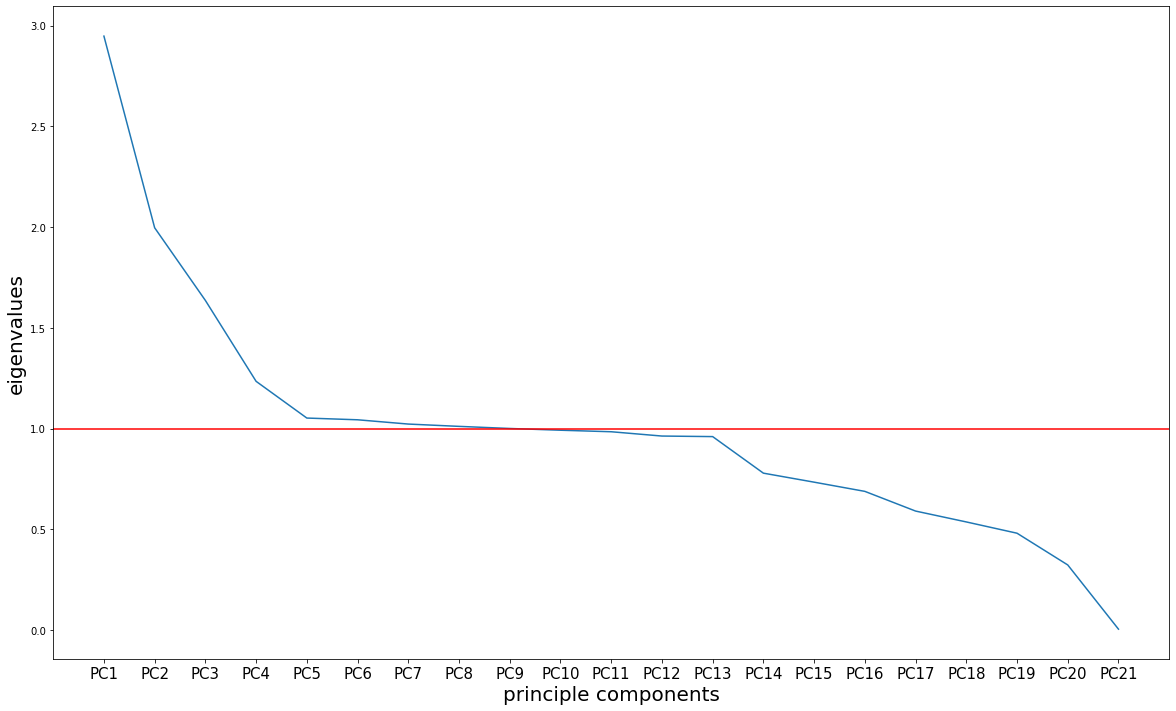

In [81]:
plt.figure(figsize=(20, 12))
plt.plot(eigenvalues)
ax1 = plt.subplot()
ax1.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
ax1.set_xticklabels(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21'], fontsize = 15)
plt.xlabel('principle components', fontsize = 20)
plt.ylabel('eigenvalues', fontsize = 20)
plt.axhline(y=1, color='red')
plt.show()

In [82]:
#Find Variance of each for the first 9 PCs (Kamara, 2022)
pc9 = PCA(n_components=9, random_state=2020)
pc9.fit(PCA_df_normalized)

varex = pc9.explained_variance_ratio_*100
vardf = pd.DataFrame(varex.round(2), columns = ['Captured Variance Per PC'], index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
vardf

,Captured Variance Per PC
PC1,14.04
PC2,9.51
PC3,7.79
PC4,5.88
PC5,5.01
PC6,4.97
PC7,4.87
PC8,4.82
PC9,4.77


In [83]:
#Identify total variance of first 9 PCs (Kamara, 2022)
print("Variance explained by the first 9 principal components = ", np.cumsum(pca.explained_variance_ratio_*100)[8])

Variance explained by the first 9 principal components =  61.679957881396426
